# Project Name:

<font size="4" ><span style="color:green" ><b>Predicting Rate of Penetration (ROP) for New Well Plans</b></span></font>

<b>Problem statement:</b><br><span style="color:green"> The process of drilling new wells, especially offshore, is extremely challenging and costly. After reaching the seabed more than 3,000 feet underwater, rigs in the Gulf, Mexico must drill through an additional 20,000 feet of rock. In these extreme temperatures and pressures specialized equipment and teams are required.<br>These operations can involve hundreds of people and equipment with very high daily drilling costs. Reducing drilling time for a few hours per well can result in significant savings for the company.<br><br></span>
 <span style="color:green">Our task is to build a model that can <b>predict the rate of penetration</b> conditional on controllable drilling parameters and parameters that are known before the drilling process begins. This model could then be used as part of the “Drilling Roadmap” development process, where the WOB and RPM (Among other variables) are determined before drilling begins.	<br><br></span>
We report a Machine Learning approach to train and predict rate of penetration.<br>
It is determined by evaluating the required amount of time to drill one foot of depth. <br><br>
<b>Table of content:</b>
   <ol type="I"><li>Data Requirement & Collections</li>
    <li>Data Understanding</li> 
    <li> Data preprocesiing</li>
    <li>Data cleaning</li>
    <li>Data visualization(EDA)/Story Telling </li>
    <li>Model fitting,Evaluation & Feedback </li>
    <li>Business Recommendation</li> </ol>
<b>The columns are described as follows:</b><br>
<ol><li><span style="color:green">segment_id</span>&nbsp; :&nbsp;  A unique ID assigned to each roughly 30 ft sections of the well bores.</li>
    <li><span style="color:green">wellbore_chev_no_id</span>&nbsp; :&nbsp; The ID associated with each well.</li>
    <li><span style="color:green">area_id</span>&nbsp; :&nbsp; Geographic area identifier. Wells in the same area tend to have similar target formations.</li>
    <li><span style="color:green">formation_id</span>&nbsp; :&nbsp; This is the rock formation being drilled through. Although the exact formations that are encountered and their depths will vary, it is reasonable to assume that for the most part this is known in advance.</li>
    <li><span style="color:green">bit_model_id</span>&nbsp; : &nbsp;Bit model selected by drilling engineer.</li>
    <li><span style="color:green">drillbit_id</span>&nbsp; :&nbsp; this is the diameter of the bit. This is part of the well plan.</li>
    <li><span style="color:green">min_depth</span>&nbsp; :&nbsp; The well plan defines the trajectory of the well, lower bound of the segment range. This is measured depth from rig in feet.</li>
    <li><span style="color:green">max_depth</span>&nbsp; :&nbsp; The well plan defines the trajectory of the well, upper bound of the segment range. This is measured depth from rig in feet</li>
    <li><span style="color:green">rate_of_penetration</span>&nbsp; :&nbsp; It’s a measure of the drilling speed. Units are feet/hour.</li>
    <li><span style="color:green">surface_weight_on_bit</span>&nbsp; :&nbsp; This is the amount of force applied downward on the bit. Units are “kips” which are 1,000 pounds of force. </li>
    <li><span style="color:green">surface_rpm</span>&nbsp; :&nbsp; This is how fast the bit is spun. Units are full rotation/minute.</li>
    </ol>

# Data Requirement & Collection,Understanding

In [1]:
#importing Required Libraries
import pandas as pd #used for data cleaning and analysis
import numpy as np #mathematical operations on arrays
import matplotlib.pyplot as plt #data visualization and graphical plotting library for Python

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [129]:
#Reading The Data
data_set = pd.read_csv("C:/Users/ramya/Downloads/Datathon/data.csv")
data_set

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,wellbore_chev_no_0_727,wellbore_chev_no_0,area_0,formation_62,bit_model_1,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,wellbore_chev_no_0_728,wellbore_chev_no_0,area_0,formation_61,bit_model_1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,wellbore_chev_no_0_729,wellbore_chev_no_0,area_0,formation_59,bit_model_1,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,wellbore_chev_no_0_730,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,wellbore_chev_no_0_731,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21930.0,21959.5,100.639811,31.406319,150.032167
...,...,...,...,...,...,...,...,...,...,...,...
6833,wellbore_chev_no_9_827,wellbore_chev_no_9,area_0,formation_88,bit_model_4,12.25,24810.0,24839.5,69.847645,20.770119,157.329500
6834,wellbore_chev_no_9_828,wellbore_chev_no_9,area_0,formation_87,bit_model_4,12.25,24840.0,24869.5,65.763896,15.634577,145.228103
6835,wellbore_chev_no_9_829,wellbore_chev_no_9,area_0,formation_87,bit_model_4,12.25,24870.0,24899.5,66.727449,15.356773,149.525178
6836,wellbore_chev_no_9_830,wellbore_chev_no_9,area_0,formation_87,bit_model_4,12.25,24900.0,24929.5,66.639130,16.970275,149.496551


# Preprocessing of data

In [3]:
data_set.head(6)

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,wellbore_chev_no_0_727,wellbore_chev_no_0,area_0,formation_62,bit_model_1,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,wellbore_chev_no_0_728,wellbore_chev_no_0,area_0,formation_61,bit_model_1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,wellbore_chev_no_0_729,wellbore_chev_no_0,area_0,formation_59,bit_model_1,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,wellbore_chev_no_0_730,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,wellbore_chev_no_0_731,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21930.0,21959.5,100.639811,31.406319,150.032167
5,wellbore_chev_no_0_732,wellbore_chev_no_0,area_0,formation_64,bit_model_1,12.25,21960.0,21989.5,101.160139,31.755384,149.999665


In [4]:
data_set.shape

(6838, 11)

In [5]:
data_set.describe()

,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
count,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000
mean,15.726309,19609.123574,19638.444245,106.997573,35.791311,156.262449
std,3.522179,5739.149255,5739.051073,55.061943,13.363067,25.217998
min,8.500000,4988.500000,5009.500000,5.382589,5.203333,60.594999
25%,12.250000,14970.000000,14999.500000,62.480077,26.348941,140.665599
50%,16.500000,20040.000000,20069.500000,100.828372,36.983090,159.661078
75%,18.125000,24120.000000,24149.500000,136.087159,44.311884,175.560704
max,26.000000,31050.000000,31070.750000,512.754999,71.328106,211.066667


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6838 entries, 0 to 6837
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   segment_id             6838 non-null   object 
 1   wellbore_chev_no_id    6838 non-null   object 
 2   area_id                6838 non-null   object 
 3   formation_id           6838 non-null   object 
 4   bit_model_id           6838 non-null   object 
 5   drillbit_size          6838 non-null   float64
 6   min_depth              6838 non-null   float64
 7   max_depth              6838 non-null   float64
 8   rate_of_penetration    6838 non-null   float64
 9   surface_weight_on_bit  6838 non-null   float64
 10  surface_rpm            6838 non-null   float64
dtypes: float64(6), object(5)
memory usage: 587.8+ KB


# Data Cleaning

In [7]:
#checking weather dataset have null values
data_set.isnull().sum()

segment_id               0
wellbore_chev_no_id      0
area_id                  0
formation_id             0
bit_model_id             0
drillbit_size            0
min_depth                0
max_depth                0
rate_of_penetration      0
surface_weight_on_bit    0
surface_rpm              0
dtype: int64

In [8]:
#checking weather dataset have duplicated values
data_set.duplicated().sum()

0

In [9]:
#checking The datatypes
data_set.dtypes

segment_id                object
wellbore_chev_no_id       object
area_id                   object
formation_id              object
bit_model_id              object
drillbit_size            float64
min_depth                float64
max_depth                float64
rate_of_penetration      float64
surface_weight_on_bit    float64
surface_rpm              float64
dtype: object

In [10]:
#find out numerical and categorical features for data set

numerical_features=[feature for feature in data_set.columns if data_set[feature].dtype!='O']
categorical_features=[feature for feature in  data_set.columns if  data_set[feature].dtype=='O' and feature!='surface_rpm']

print('categorical features: ''\n',categorical_features)
print('\n')
print('numerical features: ''\n',numerical_features)

categorical features: 
 ['segment_id', 'wellbore_chev_no_id', 'area_id', 'formation_id', 'bit_model_id']


numerical features: 
 ['drillbit_size', 'min_depth', 'max_depth', 'rate_of_penetration', 'surface_weight_on_bit', 'surface_rpm']


In [11]:
#Frequency of Catagorical Variable
categorical_features=[feature for feature in  data_set.columns if  data_set[feature].dtype=='O' and feature!='income']
for feature in categorical_features:
    freq=data_set[feature].value_counts().rename_axis(feature).reset_index(name='frequency')
    print('\n')
    print(freq)



                   segment_id  frequency
0      wellbore_chev_no_0_727          1
1      wellbore_chev_no_5_460          1
2      wellbore_chev_no_5_458          1
3      wellbore_chev_no_5_457          1
4      wellbore_chev_no_5_456          1
...                       ...        ...
6833  wellbore_chev_no_20_302          1
6834  wellbore_chev_no_20_301          1
6835  wellbore_chev_no_20_300          1
6836  wellbore_chev_no_20_299          1
6837   wellbore_chev_no_9_831          1

[6838 rows x 2 columns]


    wellbore_chev_no_id  frequency
0   wellbore_chev_no_20        701
1    wellbore_chev_no_8        677
2    wellbore_chev_no_6        661
3    wellbore_chev_no_5        643
4    wellbore_chev_no_2        628
5   wellbore_chev_no_24        587
6    wellbore_chev_no_3        549
7   wellbore_chev_no_15        440
8    wellbore_chev_no_9        435
9   wellbore_chev_no_13        366
10  wellbore_chev_no_18        195
11  wellbore_chev_no_17        176
12  wellbore_chev_no_12 

# Data Visualization

<AxesSubplot:xlabel='count', ylabel='wellbore_chev_no_id'>

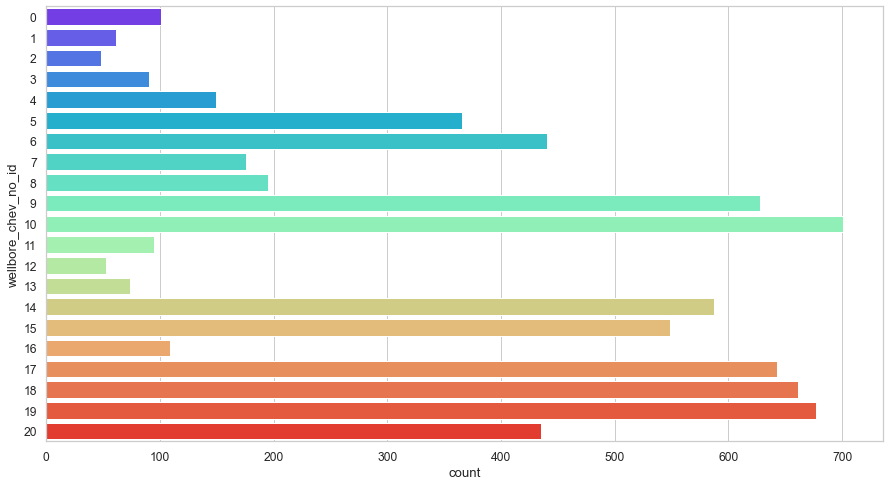

In [124]:
import seaborn as sns
plt.figure(figsize = (15,8))
sns.countplot(y='wellbore_chev_no_id', data=data_set, palette="rainbow")

### From the above plot :
#### we can conclude that "wellbore_chev_no_20" have highest Count where as "wellbore_chev_no_10" have the least count in dataset

<AxesSubplot:xlabel='area_id', ylabel='count'>

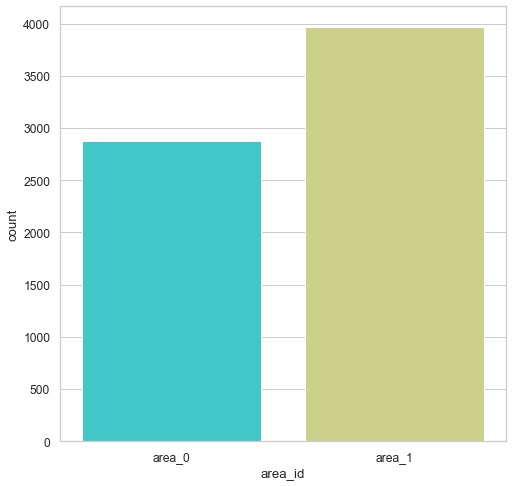

In [142]:
plt.figure(figsize = (8,8))
sns.countplot(data_set['area_id'],palette="rainbow")

### From the above plot :
#### we can conclude that around 4000 Id's are in "area_id 1" where as nearly 3000 Id's in "area_id 0"

<AxesSubplot:xlabel='count', ylabel='formation_id'>

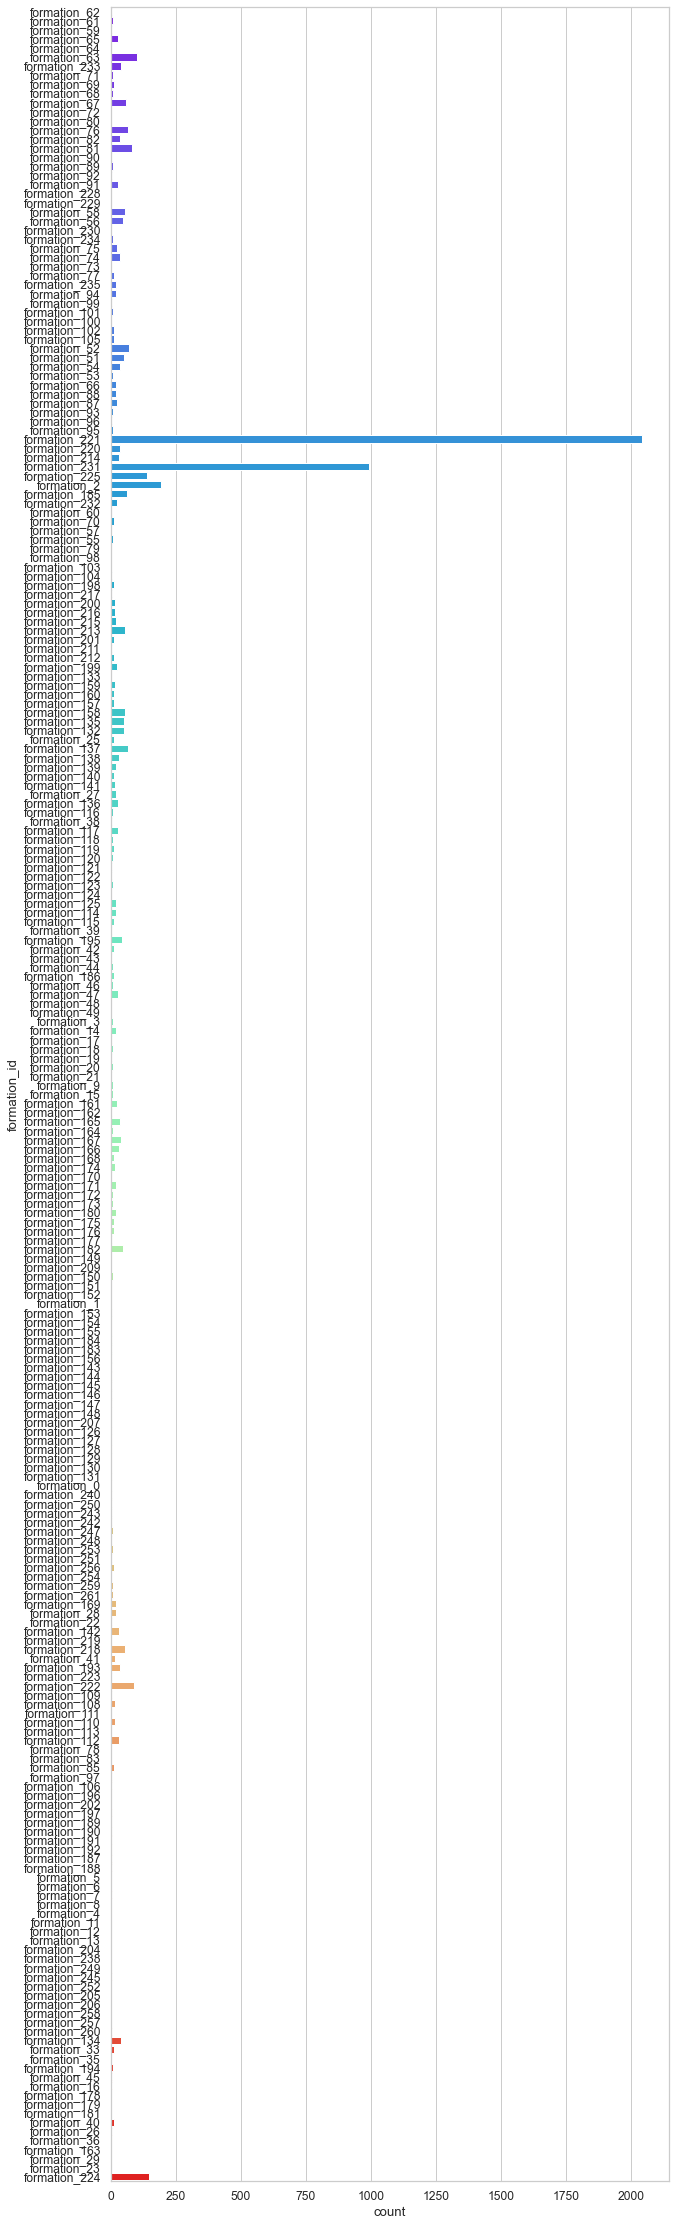

In [141]:
plt.figure(figsize=(10,40))
sns.countplot(y='formation_id',data=data_set,palette="rainbow")

### From the above plot :
#### we can see that formation_221 have high count

<AxesSubplot:xlabel='count', ylabel='bit_model_id'>

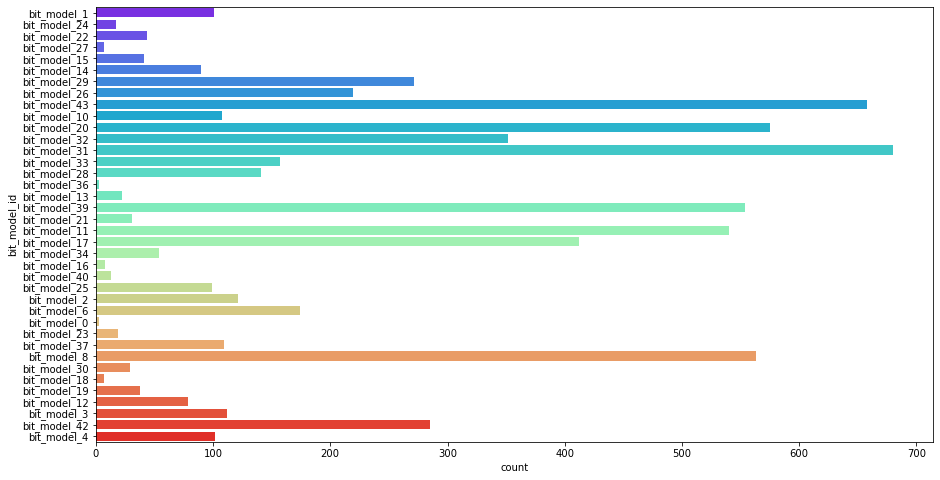

In [16]:
plt.figure(figsize = (15,8))
sns.countplot(y='bit_model_id', data=data_set, palette="rainbow")

### From the above plot :
#### we can conclude that "bit_model_31" have highest Count where as "bit_model_0" have the least count in dataset

# Bi-Varient

<AxesSubplot:xlabel='count', ylabel='area_id'>

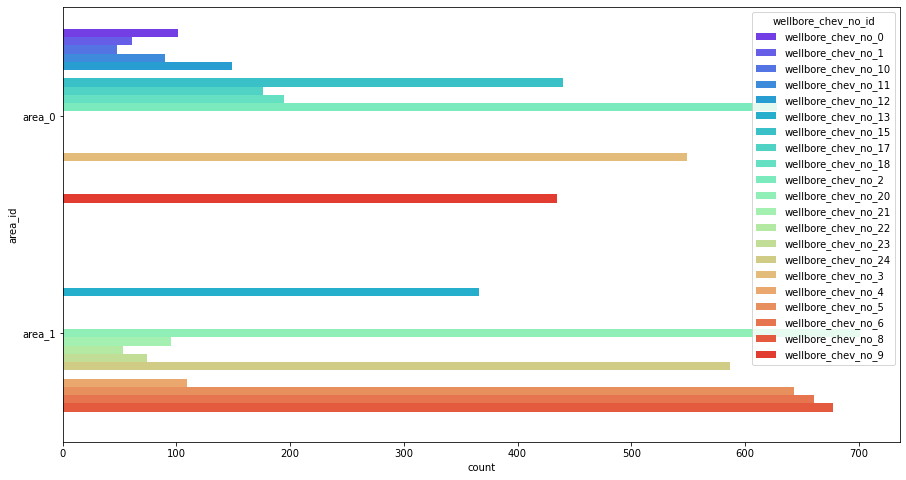

In [17]:
plt.figure(figsize = (15,8))
sns.countplot(y="area_id", hue="wellbore_chev_no_id", data=data_set, palette="rainbow")

### From the above plot :
#### we can conclude that in area_1 well_bore_id_9 have high frequency and in area_0 well_bore_id_2 have higest frequency

<AxesSubplot:xlabel='count', ylabel='area_id'>

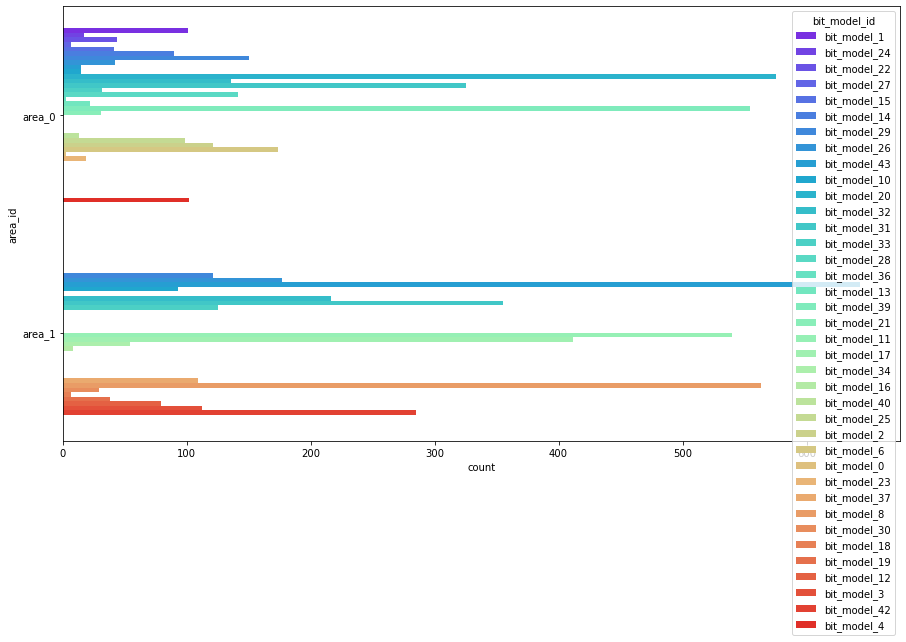

In [18]:
plt.figure(figsize = (15,8))
sns.countplot(y="area_id", hue="bit_model_id", data=data_set, palette="rainbow")

### From the above plot :
#### we can conclude that in area_1 bit_model_id_43 have high frequency and in area_0 bit_model_id_20 have higest frequency

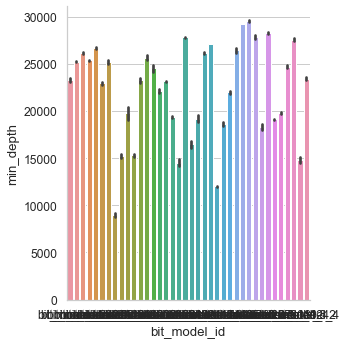

In [137]:
sns.catplot(x="bit_model_id", y="min_depth", kind="bar", data=data_set)

### the above plot is about Visualizing between bit_model_id, min_depth
#### we can conclude that in  bit_model_id_31 have high min_depth

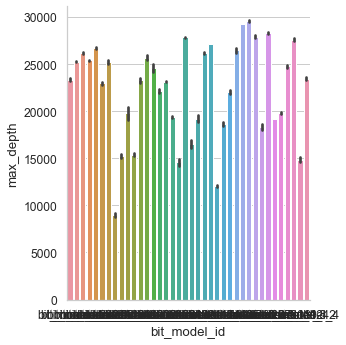

In [139]:
sns.catplot(x="bit_model_id", y="max_depth", kind="bar", data=data_set)

### the above plot is about Visualizing between bit_model_id, man_depth
#### we can conclude that in  bit_model_id_31 have high min_depth

In [20]:
#Target Variable Analysis
data_set['rate_of_penetration'].value_counts()

99.614650     1
133.276190    1
144.774063    1
138.418125    1
141.761475    1
             ..
135.813123    1
80.702502     1
126.072064    1
131.175862    1
66.986291     1
Name: rate_of_penetration, Length: 6838, dtype: int64

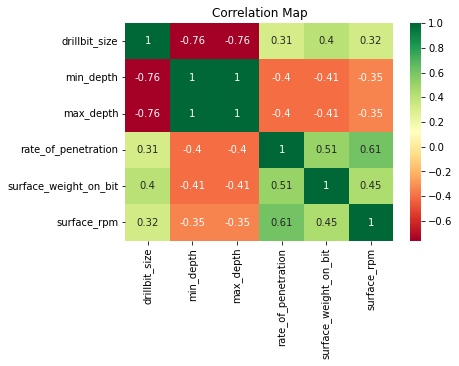

In [21]:
#Correlation Map
corr_data=data_set.copy()
for feature in categorical_features:
    corr_data.drop(feature,axis=1,inplace=True)

    
ax=sns.heatmap(corr_data.corr(), cmap='RdYlGn',annot=True)
ax.set_title('Correlation Map')
plt.show()

# Data Transformation

In [22]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [23]:
#Transforming formation_id
data_set['formation_id'] = label_encoder.fit_transform(data_set['formation_id'])  
data_set['formation_id'].unique()
data_set.head(5)

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,wellbore_chev_no_0_727,wellbore_chev_no_0,area_0,200,bit_model_1,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,wellbore_chev_no_0_728,wellbore_chev_no_0,area_0,199,bit_model_1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,wellbore_chev_no_0_729,wellbore_chev_no_0,area_0,196,bit_model_1,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,wellbore_chev_no_0_730,wellbore_chev_no_0,area_0,203,bit_model_1,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,wellbore_chev_no_0_731,wellbore_chev_no_0,area_0,203,bit_model_1,12.25,21930.0,21959.5,100.639811,31.406319,150.032167


In [24]:
#Transforming segment_id
data_set['segment_id'] = label_encoder.fit_transform(data_set['segment_id'])  
data_set['segment_id'].unique()
data_set.head(5)

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,0,wellbore_chev_no_0,area_0,200,bit_model_1,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,1,wellbore_chev_no_0,area_0,199,bit_model_1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,2,wellbore_chev_no_0,area_0,196,bit_model_1,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,3,wellbore_chev_no_0,area_0,203,bit_model_1,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,4,wellbore_chev_no_0,area_0,203,bit_model_1,12.25,21930.0,21959.5,100.639811,31.406319,150.032167


In [25]:
#Transforming wellbore_chev_no_id
data_set['wellbore_chev_no_id'] = label_encoder.fit_transform(data_set['wellbore_chev_no_id'])  
data_set['wellbore_chev_no_id'].unique()
data_set.head(5)

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,0,0,area_0,200,bit_model_1,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,1,0,area_0,199,bit_model_1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,2,0,area_0,196,bit_model_1,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,3,0,area_0,203,bit_model_1,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,4,0,area_0,203,bit_model_1,12.25,21930.0,21959.5,100.639811,31.406319,150.032167


In [26]:
#Transforming area_id
data_set['area_id'] = label_encoder.fit_transform(data_set['area_id'])  
data_set['area_id'].unique()
data_set.head(5)

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,0,0,0,200,bit_model_1,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,1,0,0,199,bit_model_1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,2,0,0,196,bit_model_1,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,3,0,0,203,bit_model_1,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,4,0,0,203,bit_model_1,12.25,21930.0,21959.5,100.639811,31.406319,150.032167


In [27]:
#Transforming bit_model_id
data_set['bit_model_id'] = label_encoder.fit_transform(data_set['bit_model_id'])  
data_set['bit_model_id'].unique()
data_set.head(5)

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,0,0,0,200,1,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,1,0,0,199,1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,2,0,0,196,1,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,3,0,0,203,1,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,4,0,0,203,1,12.25,21930.0,21959.5,100.639811,31.406319,150.032167


In [28]:
data_set.head()

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,0,0,0,200,1,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,1,0,0,199,1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,2,0,0,196,1,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,3,0,0,203,1,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,4,0,0,203,1,12.25,21930.0,21959.5,100.639811,31.406319,150.032167


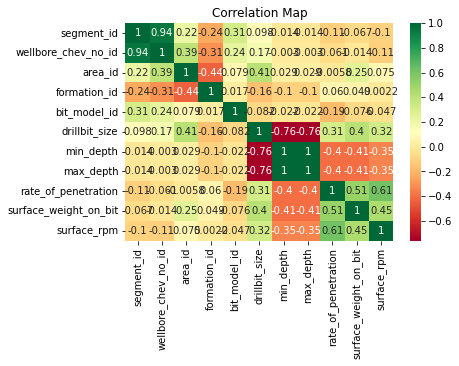

In [29]:
#Correlation Map after Transformation
import seaborn as sns
corr_data=data_set.copy()   
ax=sns.heatmap(corr_data.corr(), cmap='RdYlGn',annot=True)
ax.set_title('Correlation Map')
plt.show()

# Model fitting,Evaluation & Feedback

In [33]:
#Split data into training and test data.
from sklearn.model_selection import train_test_split

In [34]:
x = data_set.loc[:, data_set. columns != 'rate_of_penetration']
y = data_set['rate_of_penetration']

In [35]:
x.head()

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,surface_weight_on_bit,surface_rpm
0,0,0,0,200,1,12.25,21834.5,21839.5,43.533280,150.369091
1,1,0,0,199,1,12.25,21840.0,21869.5,42.382033,150.369001
2,2,0,0,196,1,12.25,21870.0,21899.5,48.675129,150.429335
3,3,0,0,203,1,12.25,21900.0,21929.5,30.041290,150.080000
4,4,0,0,203,1,12.25,21930.0,21959.5,31.406319,150.032167


In [36]:
y.head()

0     99.614650
1     99.354021
2     83.622907
3     85.427731
4    100.639811
Name: rate_of_penetration, dtype: float64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5470, 10)
(5470,)
(1368, 10)
(1368,)


In [39]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#model selection
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

In [40]:
regressor1 = DecisionTreeRegressor(random_state=0)
regressor1.fit( x_train, y_train)

DecisionTreeRegressor(random_state=0)

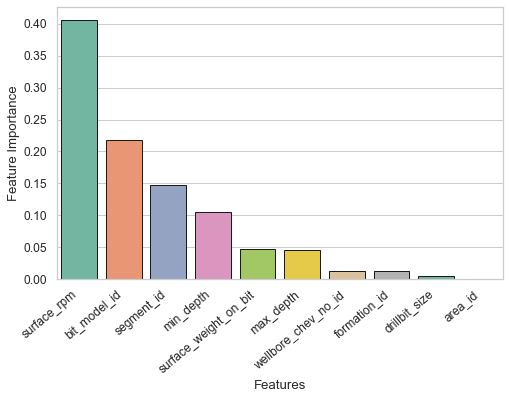

In [41]:
feat_importances = pd.Series(regressor1.feature_importances_, index=x_train.columns)
feat_importances=feat_importances.nlargest(x_train.shape[1])
ax=sns.barplot(feat_importances.index, feat_importances.values ,edgecolor='k', palette='Set2')
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [42]:
print('training score', regressor1.score(x_train, y_train))
print('testing score', regressor1.score(x_test, y_test))

training score 1.0
testing score 0.7919360427733371


In [43]:
ypred_m1 = regressor1.predict(x_test)
print(ypred_m1)

[147.2949043 190.4281245 139.7024302 ... 128.6279669 107.3342078
 126.9001348]


In [44]:
from sklearn import metrics 
def print_error(x_test, y_test, model_name): 
    prediction = model_name.predict(x_test) 
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))   
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction))) 

In [45]:
print_error(x_test,y_test,regressor1) 

Mean Absolute Error: 12.418667272836256
Mean Squared Error: 643.258311119969
Root Mean Squared Error: 25.362537552854782


In [49]:
from sklearn.metrics import r2_score
print(r2_score(y_test, ypred_m1))

0.7919360427733371


In [51]:
Adj_r2 = 1 - (1-r2_score(y_test, ypred_m1)) * (len(y)-1)/(len(y)-x.shape[1]-1)
Adj_r2

0.7916312764671607

<big><b><span style='color:green'>statement:</span></b></big>DecisionTreeRegressor predicted the rate_of_penetration with accuracy of 79% and RMSE with 25

In [59]:
from sklearn.neural_network import MLPRegressor

In [60]:
regressor2 = MLPRegressor(random_state=1, max_iter=500)
regressor2.fit(x_train, y_train)

MLPRegressor(max_iter=500, random_state=1)

In [61]:
print('training score', regressor2.score(x_train, y_train))
print('testing score', regressor2.score(x_test, y_test))

training score 0.523372895686626
testing score 0.5502761865382597


In [62]:
ypred_m2 = regressor2.predict(x_test)
print(ypred_m2)

[118.49704926 149.02317127 137.11792678 ... 135.5818247  129.83216209
 137.84016848]


In [63]:
print_error(x_test,y_test,regressor2) 

Mean Absolute Error: 25.88338047733491
Mean Squared Error: 1390.3829599986066
Root Mean Squared Error: 37.28783930450525


In [64]:
print(r2_score(y_test, ypred_m2))

0.5502761865382597


In [65]:
Adj_r2 = 1 - (1-r2_score(y_test, ypred_m2)) * (len(y)-1)/(len(y)-x.shape[1]-1)
Adj_r2

0.5496174435860673

<big><b><span style='color:green'>statement:</span></b></big>MLPRegressor predicted the rate_of_penetration with accuracy of only 55% and RMSE with 37

In [66]:
from sklearn import linear_model

In [67]:
regressor3 = linear_model.Lasso(alpha=0.1)
regressor3.fit(x_train, y_train)

Lasso(alpha=0.1)

In [68]:
print('training score', regressor3.score(x_train, y_train))
print('testing score', regressor3.score(x_test, y_test))

training score 0.5163739738970395
testing score 0.547762629664281


In [69]:
#predict the income for test data
ypred_m3 = regressor3.predict(x_test)
print(ypred_m4)

[104.59884457 145.20051565 119.13238637 ... 132.61028875 116.75375112
 121.46905494]


In [70]:
print_error(x_test,y_test,regressor3) 

Mean Absolute Error: 25.750545777869313
Mean Squared Error: 1398.1539664295672
Root Mean Squared Error: 37.391897069145436


In [71]:
print(r2_score(y_test, ypred_m3))

0.547762629664281


In [72]:
Adj_r2 = 1 - (1-r2_score(y_test, ypred_m3)) * (len(y)-1)/(len(y)-x.shape[1]-1)
Adj_r2

0.5471002049237863

<big><b><span style='color:green'>statement:</span></b></big>LASSORegresssor predicted same like mlpregresssor with the rate_of_penetration with accuracy of only 54% and RMSE with 37

In [73]:
 from sklearn.ensemble import RandomForestRegressor

In [74]:
regressor4 = RandomForestRegressor()
regressor4.fit(x_train, y_train)

RandomForestRegressor()

In [75]:
print('training score', regressor4.score(x_train, y_train))
print('testing score', regressor4.score(x_test, y_test))

training score 0.9885007434080033
testing score 0.8639110709293183


In [76]:
ypred_m4 = regressor4.predict(x_test)
print(ypred_m4)

[148.45114442 183.59318743 134.47677126 ... 117.58299777 103.73281155
 124.41425922]


In [77]:
print_error(x_test,y_test,regressor4) 

Mean Absolute Error: 10.090771217786038
Mean Squared Error: 420.73762242619654
Root Mean Squared Error: 20.51188978193371


In [78]:
print(r2_score(y_test, ypred_m4))

0.8639110709293183


In [79]:
Adj_r2 = 1 - (1-r2_score(y_test, ypred_m4)) * (len(y)-1)/(len(y)-x.shape[1]-1)
Adj_r2

0.8637117316454884

<big><b><span style='color:green'>statement:</span></b></big>RandomforestRegressor gives best accuracy of 86% and RMSE with 20

In [80]:
from sklearn.neighbors import KNeighborsRegressor

In [81]:
regressor5 = KNeighborsRegressor(n_neighbors=3)
regressor5.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [82]:
print('training score', regressor5.score(x_train, y_train))
print('testing score', regressor5.score(x_test, y_test))

training score 0.9575119350690663
testing score 0.8538042513411113


In [83]:
ypred_m5 = regressor5.predict(x_test)
print(ypred_m5)

[147.585177   185.53841987 138.0259422  ... 119.90000173 107.56150737
 121.93316597]


In [84]:
print_error(x_test,y_test,regressor6) 

Mean Absolute Error: 11.158175699524854
Mean Squared Error: 451.9842438293539
Root Mean Squared Error: 21.25992106827666


In [85]:
print(r2_score(y_test, ypred_m5))

0.8538042513411113


In [86]:
Adj_r2 = 1 - (1-r2_score(y_test, ypred_m5)) * (len(y)-1)/(len(y)-x.shape[1]-1)
Adj_r2

0.853590107868636

<big><b><span style='color:green'>statement:</span></b></big>kNeighborsRegressor also gives best accuracy with 85% and RMSE with 21

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
regressor6 = LinearRegression()
regressor6.fit(x_train, y_train)
ypred_m6 = regressor6.predict(x_test)
print(r2_score(y_test, ypred_m6))

0.5497032701639128


In [103]:
Adj_r2 = 1 - (1-r2_score(y_test, ypred_m6)) * (len(y)-1)/(len(y)-x.shape[1]-1)
Adj_r2

0.5490436880197265

In [104]:
print_error(x_test,y_test,regressor6) 

Mean Absolute Error: 25.7719641791621
Mean Squared Error: 1392.154209686864
Root Mean Squared Error: 37.31158278185025


<big><b><span style='color:green'>statement:</span></b></big>LinearRegression  gives accuracy of 54% and RMSE with 37

<font size="5"><span style="color:blue"><b>conclusion:</b></span></font><span style="color:red" ><font size = "5">  randomforest gives an amazing accuracy of around 86 % based on r2_score and adj r2_score.</font></span>